In [0]:
import pandas as pd
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

#Reading the Data
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CC.csv')


In [5]:
#Removing the unrequired columns
x = data.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]]
#Filling all the null values with mean
x=x.apply(lambda x: x.fillna(x.mean()),axis=0)
print(x.isnull().sum())

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [0]:
# Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()# Fit on training set only.
scaler.fit(x)
# Apply transform to both the training set and the test set.
x= scaler.transform(x)
X_scaled_array=scaler.transform(x)
X_scaled=pd.DataFrame(X_scaled_array)
x=X_scaled

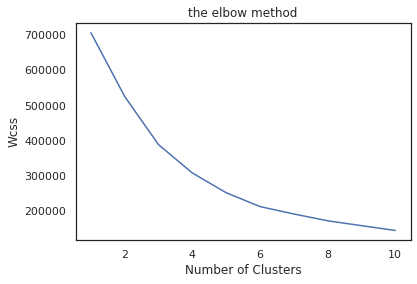

In [8]:
#Plotting the Elbow Graph for best K value
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [0]:
#WE GOT K=3
#Building the model
from sklearn.cluster import KMeans
nclusters = 3              # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(x)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(x)

In [12]:
#Silhouette Score
from sklearn import metrics
score = metrics.silhouette_score(x, y_cluster_kmeans)
print(score)


0.330629590702156
